# AST 208 Lab 10: Working with Spectra (64 Points)

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>
**Cesarine Graham**
\
**04/13/2023 and 04/20/2023** 
\
**Team Name:** 
\
**Collaborators: Sofia Biriouk, Sam Monique, Owen James** 

In [1]:
# Run this cell first to load the numpy and matplotlib.pyplot modules
import numpy as np
%matplotlib inline
# load the fits module
from astropy.io import fits
# load graphics
import matplotlib.pyplot as plt

## Introduction: NGC 7259

The `Lab12` folder contains three images of the galaxy pair NGC 7259 observed with the SOAR telescope and the Goodman High-Throughput Spectrograph.

1. `n7259_im.fits`: an image of the galaxy
2. `n7259_slit.fits`: an image of the bright spiral galaxy after applying the slit.
3. `n7259_sp.fits`: the spectrum produced by projecting the slit onto a diffraction grating in the Goodman Spectrograph on the SOAR telescope.

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 1) Load the image `n7259_im.fits` in DS9. Zoom in and adjust the image scaling to produce a sharp image of the bright face-on spiral galaxy.  Embed a copy of the image here. Report the x/y coordinates of the center of the galaxy.

<span style="color:red">(3 pts total)</span>

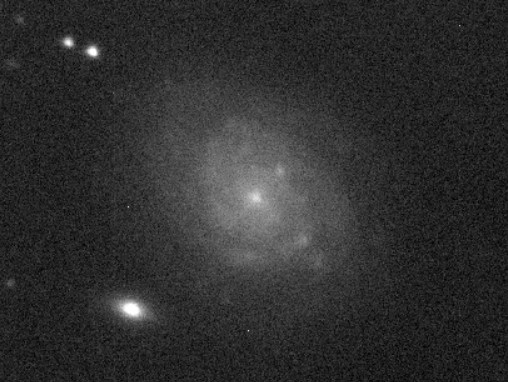

<span style="color:seagreen"> 
    
#### Coordinates:(1725.72, 699.611)

Load the image `n7259_slit.fits` in DS9. In this image, we've put in a slit mask that blocks most of the light from the sky, only letting in a skinny sliver (matched to your image seeing, usually $\sim$1$^{\prime\prime}$ wide). Since the `n7259_im.fits` image, we have tweaked the position of the telescope so the galaxy is now centered in the slit.

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 2) Adjust the image scaling so that you can find the center of the galaxy in the slit, and embed that image in this notebook. Zoom and crop your image so that the slit is clearly visible in the embedded image. Report the x/y coordinates of the center of the galaxy in this image.

<span style="color:red">(3 pts total)</span>

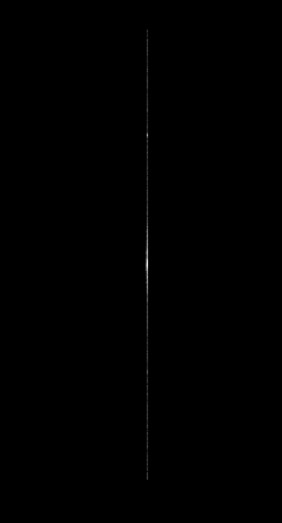

<span style="color:seagreen"> 
    
#### Coordinates:(1541.23, 1452.86)

Load the image `n7259_sp.fits` in DS9. Everything is the same `n7259_slit.fits`, except a diffraction grating has been added to the light path. 

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 3) Adjust the image scaling so that the spectrum is clearly visible, and crop your image to the spectrum. Embed a copy of that image here.

<span style="color:red">(2 pts total)</span>


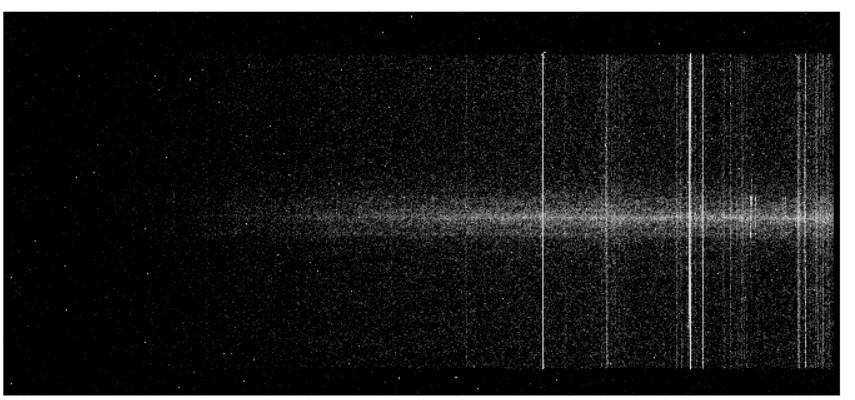

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 4) Explain the image: what does each axis represent? Which side represents short wavelengths (blue)? 

<span style="color:red">(2 pts total)</span>


<span style="color:seagreen"> 

#### The x-axis is wavelength and the y-axis is the y-position on the image. The right is red and the left is blue.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 5) Find the emission lines at $x=3398$ and $x=3702$. One comes from the galaxy, one comes from the night sky. Determine which is which, and explain your reasoning.

<span style="color:red">(3 pts total)</span>


<span style="color:seagreen"> 

#### x=3702 comes from the galaxy since the spectrum line only spans for the length of the galaxy, while the other line spans the entire y-axis and is the night sky.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 6) How would the spectrum change if the galaxy were more distant, so that it is moving away from us at high velocity?

<span style="color:red">(1 pts total)</span>


<span style="color:seagreen"> 

#### If it was more distant and moving away at a high velocity, then it would be red shifted and more to the right side of the spectrum.

## Mystery spectra

\begin{equation}\newcommand{\kmpers}{\mathrm{km\,s^{-1}}}\end{equation}
Now we are going to examine three "mystery" spectra—`spec1.fits`, `spec2.fits`, `spec3.fits`—and determine the origin of each. All three spectra are related to white dwarfs, a star that is produced after a low-mass star—like our sun—ends its hydrogen- and helium-fusion. The particulars of each source are as follows.

A. One spectrum is from a type Ia supernova, which occurred in a galaxy 115 Mpc away.  A type Ia supernova is an explosion caused by the thermonuclear incineration of a white dwarf. The white dwarf is completely destroyed in the explosion. The spectrum in this lab was taken 25 days after explosion.  At this time the spectra of type Ia supernovae show both emission and absorption lines with expansion velocities of $10\,000–20\,000\,\kmpers$. A key feature of type Ia supernovae is a complete *absence* of any lines from hydrogen in their spectra.

B. One spectrum is from a recurrent nova, which occurred 4.5 kpc away—so in the Milky Way. Novae are thermonuclear explosions on the surfaces of white dwarfs that accreted material from a binary companion star.  The white dwarf survives a nova (unlike in a Type Ia supernova), but a small amount of mass is ejected from the system. This ejected material expands in a cloud at speeds $\approx 100–1000\,\kmpers$.  The spectrum was taken 20 months after the explosion; by this time the spectrum is expected to be dominated by emission lines from the expanding shell of ejected matter.

C. One spectrum is from a single, quiet, white dwarf located 200 pc away in the Milky Way. White dwarfs, like all stars, have spectra with absorption lines from their atmosphere.

### Inspection

Inspect the three source spectra in DS9. Note the $x$-position of the brightest sky emission line for each spectrum. You will need these to calibrate the spectra.

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 7) Do any of the sources show evidence for extended structure? That is, is the source more extended than a simple point source? If so, produce an image that highlights this structure and embed it here. Explain your reasoning.

<span style="color:red">(4 points total</span>)

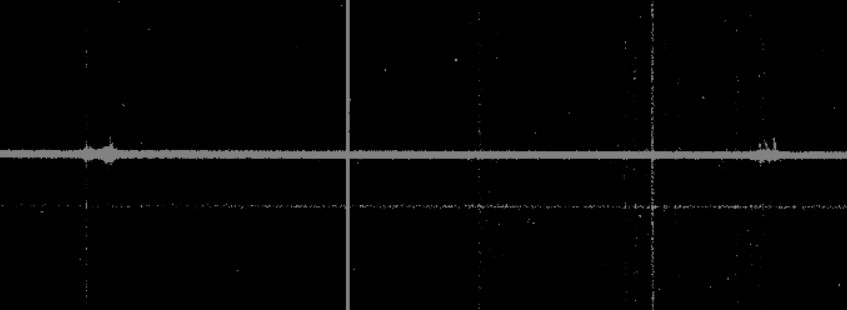

<span style="color:seagreen"> 

#### The three brightest spectra:
    1. 2677.79
    2. 2670.79
    3. 2680.9
    
<span style="color:seagreen"> 

#### Spec1.fit shows evidence for an extended structure. This is due to the strange looking features on the slit that are not present on the other fit files. These features are also very far apart which further concludes in an extended structure.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 8) In the following cell, load `spec1.fits`, `spec2.fits`, and `spec3.fits` into arrays. Print the dimensions of these arrays.

<span style="color:red">(3 pts total)</span>

In [2]:
print('reading spec1.fits:')
spec1_raw = fits.open('spec1.fits',ignore_missing_end=True)
# load the fits data into a numpy array
spec1 = np.array(spec1_raw[0].data[0],dtype=np.float64)
print('got an array of dimension ',spec1.shape)

print('reading spec2.fits:')
spec2_raw = fits.open('spec2.fits',ignore_missing_end=True)
# load the fits data into a numpy array
spec2 = np.array(spec2_raw[0].data[0],dtype=np.float64)
print('got an array of dimension ',spec2.shape)

print('reading spec3.fits:')
spec3_raw = fits.open('spec3.fits',ignore_missing_end=True)
# load the fits data into a numpy array
spec3 = np.array(spec3_raw[0].data[0],dtype=np.float64)
print('got an array of dimension ',spec3.shape)

reading spec1.fits:
got an array of dimension  (1896, 4142)
reading spec2.fits:
got an array of dimension  (1896, 4142)
reading spec3.fits:
got an array of dimension  (1896, 4142)


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 9) Take a slice of each image array that extends along the entire length of the spectrum and is centered on the bright source spectrum.  The slice should be just wide enough to encompass the light from the source, without letting in too much background noise.

<span style="color:red">(3 pts total)</span>

In [3]:
slice_1spec = spec1[872:896]
slice_2spec = spec2[872:896]
slice_3spec = spec3[930:972]

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 10) At each wavelength in the spectra, sum up all the light from the source. The result should be a one-dimensional array that contains the summed source brightness at each wavelength.  Plot this array. Label the $x$-axis and $y$-axis appropriately: what are their units?  Adjust the plot limits in both the $x$- and $y$-directions so that details in the spectrum are clearly visible. Do this for all three spectra.

<span style="color:red">(9 pts total)</span>


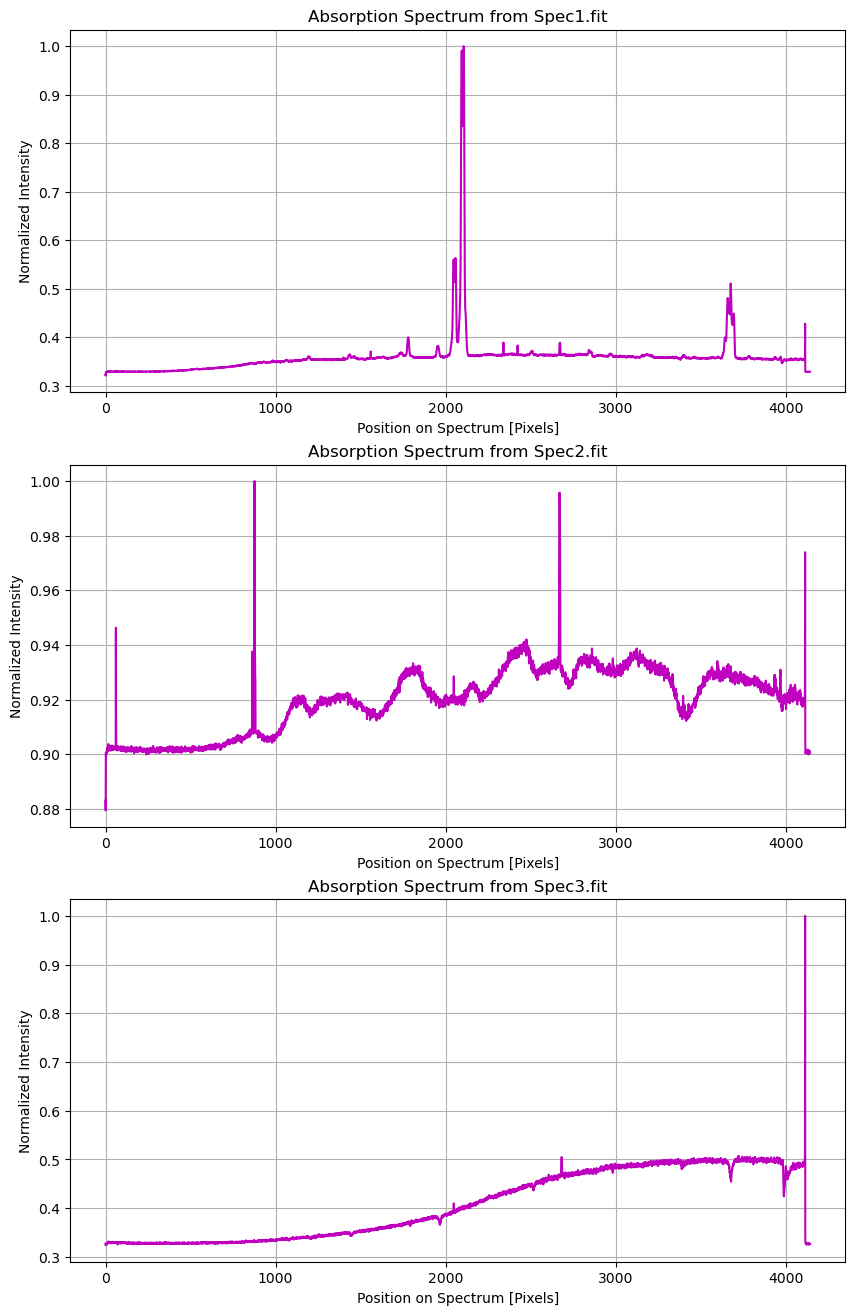

In [4]:
s1sum = np.sum(slice_1spec, axis=0)
s1sum_max = s1sum/np.max(s1sum)
x = np.arange(0,len(s1sum_max),1)

s2sum = np.sum(slice_2spec, axis=0)
s2sum_max = s2sum/np.max(s2sum)
x = np.arange(0,len(s2sum_max),1)

s3sum = np.sum(slice_3spec, axis=0)
s3sum_max = s3sum/np.max(s3sum)
x = np.arange(0,len(s3sum_max),1)

plt.figure(figsize=(10,16))

plt.subplot(3,1,1)
plt.plot(x,s1sum_max, color='m')
plt.xlabel("Position on Spectrum [Pixels]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec1.fit")
plt.grid()

plt.subplot(3,1,2)
plt.plot(x,s2sum_max, color='m')
plt.xlabel("Position on Spectrum [Pixels]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec2.fit")
plt.grid()

plt.subplot(3,1,3)
plt.plot(x,s3sum_max, color='m')
plt.xlabel("Position on Spectrum [Pixels]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec3.fit")
plt.grid()

### Calibration

In order to analyze the spectra, we first need to calibrate the wavelength scale. This is normally done using an iron (Fe) arc lamp to generate a comparison spectrum, but for this lab we will use a simpler, though less accurate, procedure.

The spectral dispersion of these three spectra is $1\, Å/\mathrm{pixel}$. This means that each pixel contains a $1\, Å$ span of wavelength. Thus, in this case, if we measure wavelength in Å, the conversion between pixel and wavelength is, by happy coincidence, simple. We still need to fix the wavelength scale for our sprectrum. To do this, we use one of the sky emission lines. The brightest sky emission line is the O<span style="font-variant: small-caps">i</span> (neutral oxygen) line at $\lambda = 5577.3\,Å$. Find this line on each spectra and determine the X position of the line in each one. **Hint: it is near 2675 Å**


Use this to create arrays holding the wavelengths for each of the three spectra. 

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 11) In the following cell, construct the wavelength scales for each of the three spectra. Then plot all three spectra with their calibrated wavelength scales. Adjust the limits as necessary and label the axes appropriately.

<span style="color:red">(9 pts total)</span> 

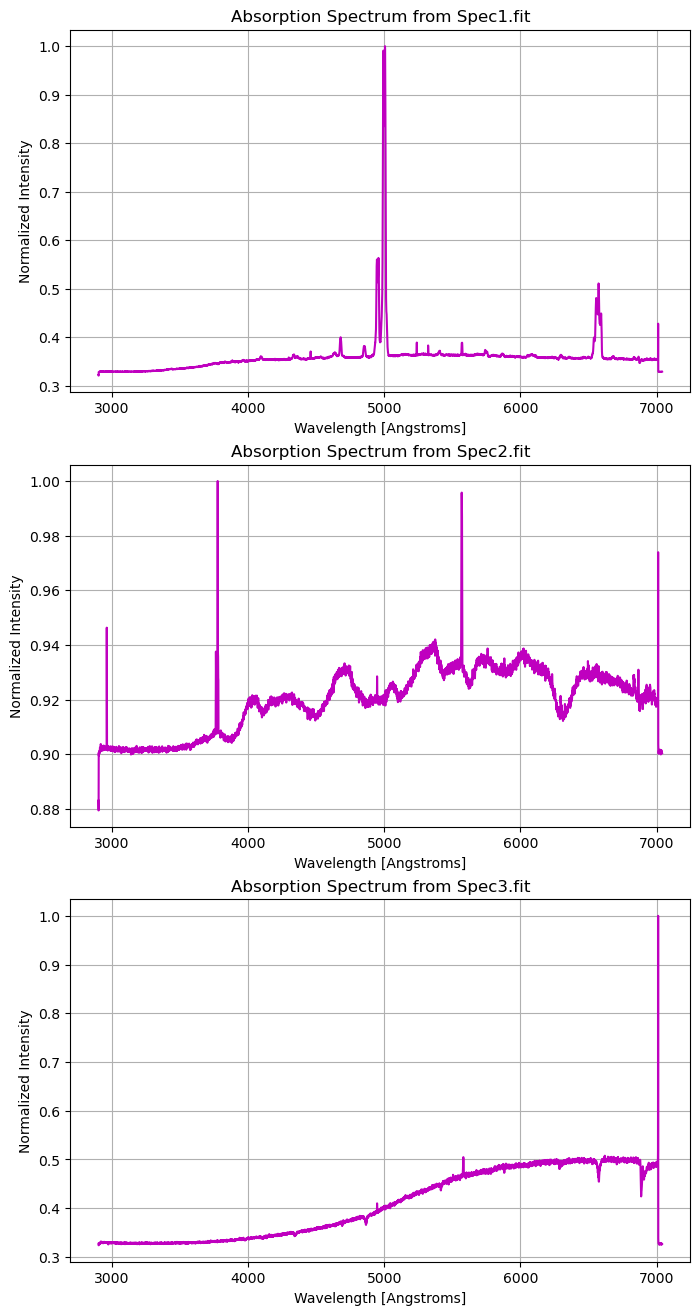

In [5]:
delta = 5577.3-2677.79

x1 = np.arange(delta,len(s1sum_max)+delta,1)
x2 = np.arange(delta,len(s2sum_max)+delta,1)
x3 = np.arange(delta,len(s2sum_max)+delta,1)

plt.figure(figsize=(8,16))

plt.subplot(3,1,1)
plt.plot(x1,s1sum_max, color='m')
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec1.fit")
plt.grid()

plt.subplot(3,1,2)
plt.plot(x2,s2sum_max, color='m')
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec2.fit")
plt.grid()

plt.subplot(3,1,3)
plt.plot(x3,s3sum_max, color='m')
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec3.fit")
plt.grid()

We also need to determine the instrumental spectral resolution—that is, how much is a narrow line spread out by the instrument optics. We can use the sky line for this as well. Sky emission lines are intrinsically narrow, so the width of this line in the spectra is entirely due to instrumental broadening.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 12) Plot the profile of the $5577.3\,Å$ O<span style="font-variant: small-caps">i</span> line, and estimate its full-width at half-max (FWHM) in Å.

<span style="color:red">(3 pts total)</span>

<i class="fa fa-exclamation-triangle" style="font-size:1.5em; color:red"></i> To get a good profile of the $5577.3\,Å$ line, take an image slice of the line from a place along the slit that is otherwise free of sources.

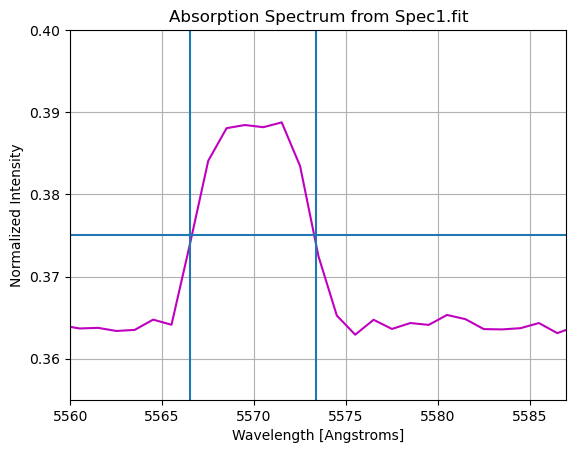

In [6]:
plt.plot(x1,s1sum_max, color='m')
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec1.fit")
plt.xlim(5560,5587)
plt.ylim(0.355,0.4)
plt.axhline(y=0.375)
plt.axvline(x=5566.5)
plt.axvline(x=5573.4)
plt.grid()

<span style="color:seagreen"> 

#### The FWHM is roughly 6.9 Angstroms for Spec1.fit

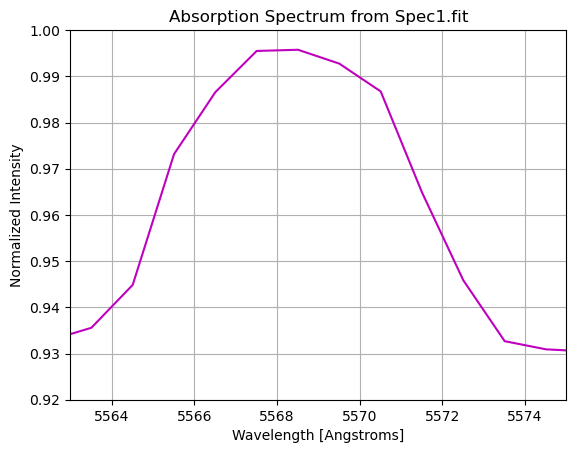

In [7]:
plt.plot(x2,s2sum_max, color='m')
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Normalized Intensity")
plt.title("Absorption Spectrum from Spec1.fit")
plt.xlim(5563,5575)
plt.ylim(0.92,1)
#plt.axhline(y=0.375)
#plt.axvline(x=5566.5)
#plt.axvline(x=5573.4)
plt.grid()

### Analysis

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 13) The H$\beta$ line has a rest wavelength of $\lambda_{\mathrm{H}\beta} = 4861.3\,Å$, and occurs when an electron in a hydrogen atom goes from the level $n=4$ to the level $n=2$ (emission) or from $n=2$ to $n=4$ (absorption). For each of the three spectra, zoom in around this line by restricting the $x$-axis to $4810–4910\,Å$.  Adjust the $y$-axis as needed to clearly display the features in the spectra. Mark the rest wavelength of H$\beta$ with a solid vertical line. Estimate the wavelength of the H$\beta$ line center, if the line is present, and the uncertainty in this estimate. On the plot of the spectra, mark this central wavelength with a vertical dashed line. 

<span style="color:red">(6 pts total)</span>

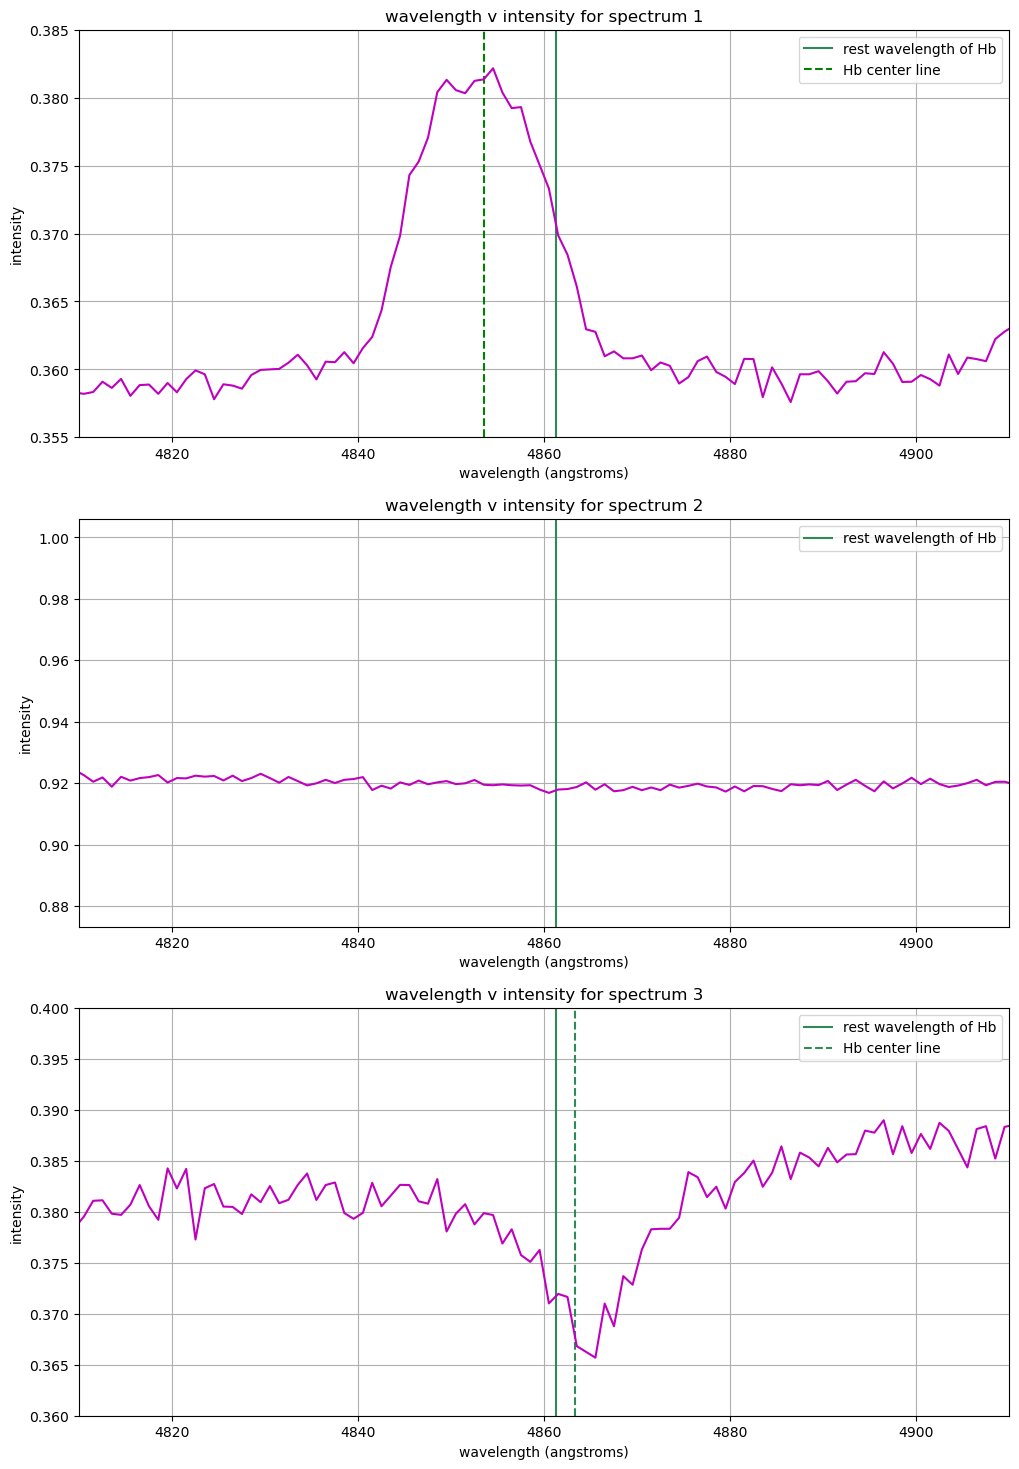

In [13]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
plt.xlim(4810,4910)
plt.ylim(0.355,0.385)
plt.axvline(4861.3, color='seagreen', label='rest wavelength of Hb')
plt.axvline(4853.5, color='green', linestyle='dashed', label='Hb center line')
plt.grid()
plt.xlabel('wavelength (angstroms)')
plt.ylabel("intensity")
plt.title("wavelength v intensity for spectrum 1")
plt.plot(x1,s1sum_max, color='m')
plt.legend()

plt.subplot(3,1,2)
plt.xlim(4810,4910)
plt.axvline(4861.3, color='seagreen', label='rest wavelength of Hb')
plt.grid()
plt.xlabel('wavelength (angstroms)')
plt.ylabel("intensity")
plt.title("wavelength v intensity for spectrum 2")
plt.plot(x2,s2sum_max, color='m')
plt.legend()

plt.subplot(3,1,3)
plt.xlim(4810,4910)
plt.ylim(0.36,0.4)
plt.axvline(4861.3, color='seagreen', label='rest wavelength of Hb')
plt.axvline(4863.3, color='seagreen', linestyle='dashed', label='Hb center line')
plt.grid()
plt.xlabel('wavelength (angstroms)')
plt.ylabel("intensity")
plt.title("wavelength v intensity for spectrum 3")
plt.plot(x3,s3sum_max, color='m')
plt.legend()

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 14) Which source has H$\beta$ as an absorption line? emission line? neither?

<span style="color:red">(3 pts total)</span>

<span style="color:seagreen"> 

#### The Source 1 has an emission, the Source 3 has an absorption line, and Source 2 has neither.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 15) Use the difference between the H$\beta$ line center and the rest wavelength to determine the velocity (positive if away from us) of the objects with H$\beta$ lines. Also give the uncertainty in this velocity. If these sources are Galactic (i.e., in the Milky Way), are their velocities consistent with the rotational velocity of the Milky Way, $220\,\kmpers$?

<span style="color:red">(5 pts total)</span>

In [9]:
velocity_1 = ((4861.3 - 4853.5) / 4861.3) * 3e8
velocity_3 = ((4861.3 - 4863) / 4861.3) * 3e8

print('the velocity of Source 1 is', velocity_1, 'm/s this is 481.353 km/s')
print('the velocity of Source 3 is', velocity_3, 'm/s this is -104.910 km/s')

the velocity of Source 1 is 481352.72457985615 m/s this is 481.353 km/s
the velocity of Source 3 is -104910.2092032883 m/s this is -104.910 km/s


The *width* of the H$\beta$ line indicates the range of velocity within the object. Find the spectrum containing H$\beta$ emission. We shall use the width of the emission line to determine how rapidly the shell of gas is expanding.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 16) Plot the H$\beta$ emission line. Estimate the FWHM of the line, and mark the FWHM on the plot. Give an uncertainty on your FWHM measurement. Is the width larger than the instrumental resolution that you determined earlier from the $5577.3\,Å$ O<span style="font-variant: small-caps">i</span> line? 

<span style="color:red">(5 pts total)</span>

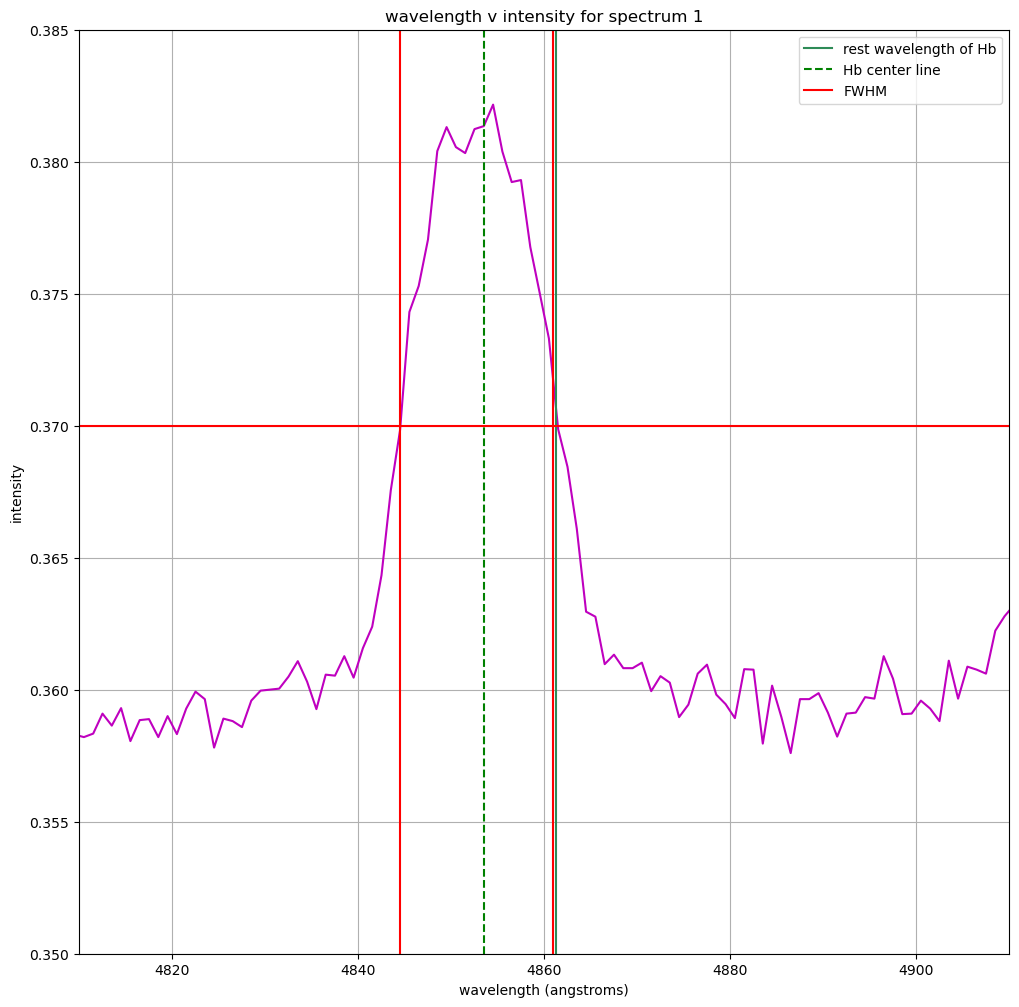

In [10]:
plt.figure(figsize=(12,12))
plt.plot(x1,s1sum_max, color='m')
plt.xlim(4810,4910)
plt.ylim(0.35,0.385)
plt.axvline(4861.3, color='seagreen', label='rest wavelength of Hb')
plt.axvline(4853.5, color='green', linestyle='dashed', label='Hb center line')
plt.axhline(0.37, color='red',label="FWHM")
plt.axvline(4844.5, color='red')
plt.axvline(4861, color='red')
plt.xlabel('wavelength (angstroms)')
plt.ylabel("intensity")
plt.title("wavelength v intensity for spectrum 1")
plt.grid()
plt.legend()

<span style="color:seagreen"> 

#### I estimate the FWHM to be roughly ($16.5\,Å$). This is higher than the instrumental resolution that I determined earlier from the $5577.3\,Å$ ($6.9\,Å \pm 0.5 \,Å$).